<a href="https://colab.research.google.com/github/adiban17/PyTorch-Tutorial/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
print("Welcome to classification with PyTorch")

Welcome to classification with PyTorch


# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another thing (there can be multiple other things as options).

In [46]:
import torch
torch.cuda.is_available()

False

## 1. Make Classification data and get it ready

In [47]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [48]:
len(X), len(y)

(1000, 1000)

In [49]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [50]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


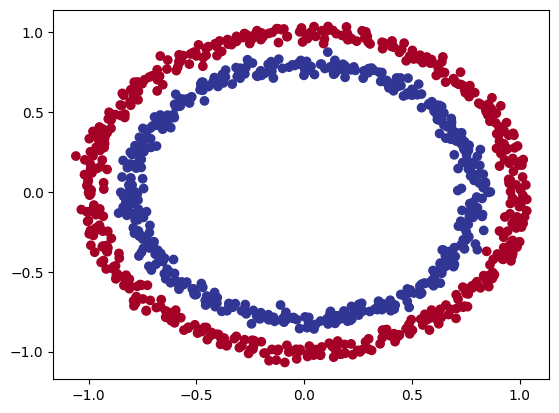

In [51]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [52]:
X.shape, y.shape

((1000, 2), (1000,))

In [53]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Value for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


In [54]:
import torch
torch.__version__

'2.9.0+cpu'

In [55]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [56]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [57]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [58]:
# Splitting our data into train, test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
len(X_train), len(X_test)

(800, 200)

In [60]:
n_samples

1000

## 2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will on an accelerator(GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [61]:
# import Torch and NN
import torch
from torch import nn

# Setting device agonistic code
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cpu'

Now we've setup device agonistic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [62]:
# 1. Construct a model that sunclasses `nn.Module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales it to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and downscales it to 1 feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x-> layer_1 -> layer_2 -> output


# 4. Instantiate an instance of our model class and send it to the taregt device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [63]:
device

'cpu'

In [64]:
next(model_0.parameters()).device

device(type='cpu')

In [65]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [66]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [67]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [68]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predicitons:{len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predicitons:200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
Which loss function or optimizer should you use ?

Again...this is problem specific.

For example, for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want to use binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how **wrong** your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`
* For different optimizers use - `torch.optim`

In [69]:
# Setup the loss function
# loss_fn = nn.BCELOSS()  # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCE loss
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLOgitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [70]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model
To train our model, we're going to need to build a training loop:
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be **raw logits**.

We can convert these **logits** into **prediction probailities** by passing them to some kind of activation function (eg: sigmoid for binary and softmax for multiclass classification).

Then we can convert our model's predictionn probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [71]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [72]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [73]:
# Use the sigmoid activation function on our model logits to turn them into prediction probailities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [74]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [75]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [76]:
device

'cpu'

In [77]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [78]:
torch.manual_seed(seed=42)
torch.cuda.manual_seed(seed=42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evvaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test.squeeze())
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits.squeeze(),
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc} | Test loss:{test_loss} | Test acc:{test_acc}")


Epoch:0 | Loss:0.6979604959487915 | Acc:51.87500000000001 | Test loss:0.6943961977958679 | Test acc:10000.0
Epoch:10 | Loss:0.6958984136581421 | Acc:51.24999999999999 | Test loss:0.6930528283119202 | Test acc:10000.0
Epoch:20 | Loss:0.6949015855789185 | Acc:51.625 | Test loss:0.692543625831604 | Test acc:10000.0
Epoch:30 | Loss:0.6943498253822327 | Acc:51.125 | Test loss:0.6923599243164062 | Test acc:10000.0
Epoch:40 | Loss:0.6940091848373413 | Acc:50.875 | Test loss:0.6923156976699829 | Test acc:10000.0
Epoch:50 | Loss:0.6937822103500366 | Acc:50.24999999999999 | Test loss:0.6923369765281677 | Test acc:10000.0
Epoch:60 | Loss:0.6936231255531311 | Acc:50.0 | Test loss:0.6923913359642029 | Test acc:10000.0
Epoch:70 | Loss:0.6935078501701355 | Acc:50.24999999999999 | Test loss:0.6924623847007751 | Test acc:10000.0
Epoch:80 | Loss:0.693422257900238 | Acc:49.875 | Test loss:0.6925414800643921 | Test acc:10000.0
Epoch:90 | Loss:0.6933572888374329 | Acc:49.875 | Test loss:0.692623496055603 |

In [79]:
test_logits.shape, y_test.shape

(torch.Size([200, 1]), torch.Size([200]))

In [80]:
circles.label.value_counts()

,count
label,
1,500
0,500


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual !

In other words, "Visualize, visualize, visualize"

TO do so, we're going to import a function called `plot_decision_boundary`

In [81]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_function").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

Download helper_function.py


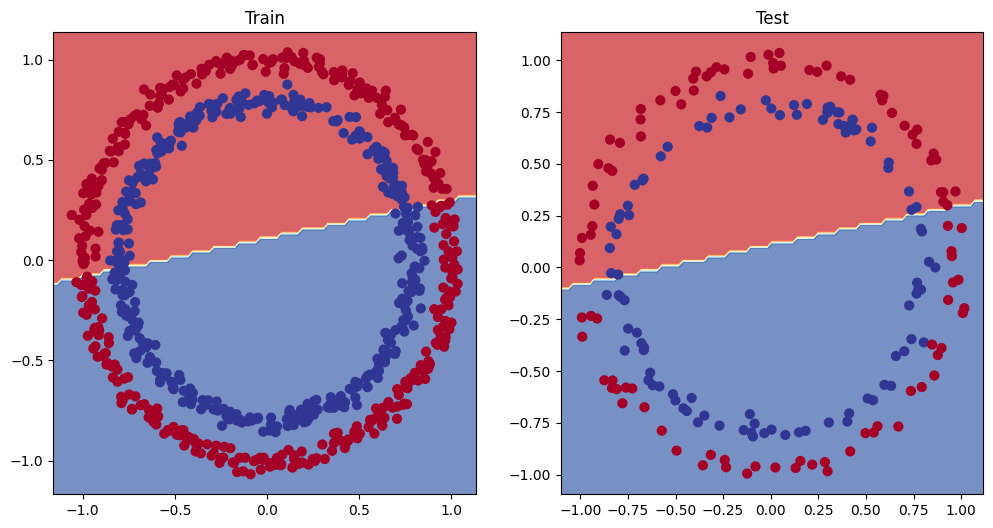

In [82]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5->10
* Increase the number of layers: 2-> 3
* Increase the number of epochs: 100 -> 1000

In [83]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [84]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)


  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_3(x)))  # this way of writing operations gives us little speedups

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [85]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [86]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]])),
             ('layer_1.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549])),
             ('layer_2.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0

In [87]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [88]:
import torch
from torch import nn

# Corrected CircleModelV1 class definition (originally in cell O8SNBmMB3fvi)
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # X_train has 2 features, so layer_1 should take 2 in_features
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # Corrected forward pass to sequentially apply layers
    return self.layer_3(self.layer_2(self.layer_1(x)))

# Instantiate the corrected model (originally in cell O8SNBmMB3fvi)
model_1 = CircleModelV1().to(device)

# Create a loss function (originally in cell 8hUwk2cA3PVA)
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer (originally in cell 8hUwk2cA3PVA)
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

torch.manual_seed(23)
torch.cuda.manual_seed(23)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate Loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc} | Test Loss:{test_loss} | Test Acc:{test_acc}")

Epoch:0 | Loss:0.6957411170005798 | Acc:50.0 | Test Loss:0.7023008465766907 | Test Acc:48.5
Epoch:100 | Loss:0.6934235095977783 | Acc:51.24999999999999 | Test Loss:0.6976144909858704 | Test Acc:46.5
Epoch:200 | Loss:0.6930980086326599 | Acc:51.125 | Test Loss:0.6961708068847656 | Test Acc:46.5
Epoch:300 | Loss:0.6930163502693176 | Acc:51.625 | Test Loss:0.6954987049102783 | Test Acc:45.5
Epoch:400 | Loss:0.6929918527603149 | Acc:51.0 | Test Loss:0.6951438188552856 | Test Acc:45.5
Epoch:500 | Loss:0.692983865737915 | Acc:51.24999999999999 | Test Loss:0.6949466466903687 | Test Acc:45.5
Epoch:600 | Loss:0.6929812431335449 | Acc:51.24999999999999 | Test Loss:0.6948345303535461 | Test Acc:46.0
Epoch:700 | Loss:0.6929803490638733 | Acc:51.125 | Test Loss:0.6947697997093201 | Test Acc:46.0
Epoch:800 | Loss:0.6929800510406494 | Acc:51.125 | Test Loss:0.6947323083877563 | Test Acc:46.0
Epoch:900 | Loss:0.6929798722267151 | Acc:51.125 | Test Loss:0.694710373878479 | Test Acc:46.0


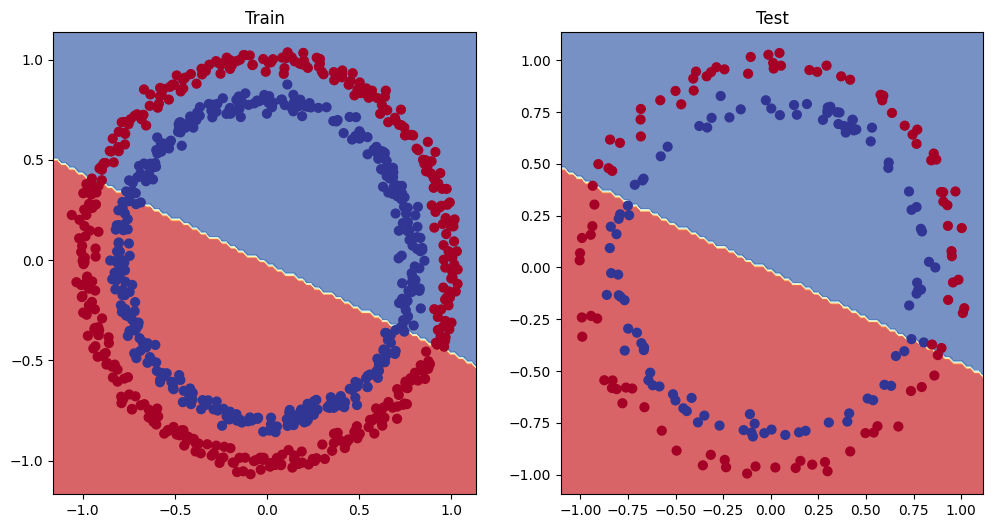

In [89]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem

In [90]:
# Create some data (same as notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias   # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]
X_regression.shape, y_regression.shape

100


(torch.Size([100, 1]), torch.Size([100, 1]))

In [91]:
# Create train and test splits
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2)

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

# Check their shape
X_train_regression.shape, y_train_regression.shape, X_test_regression.shape, y_test_regression.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

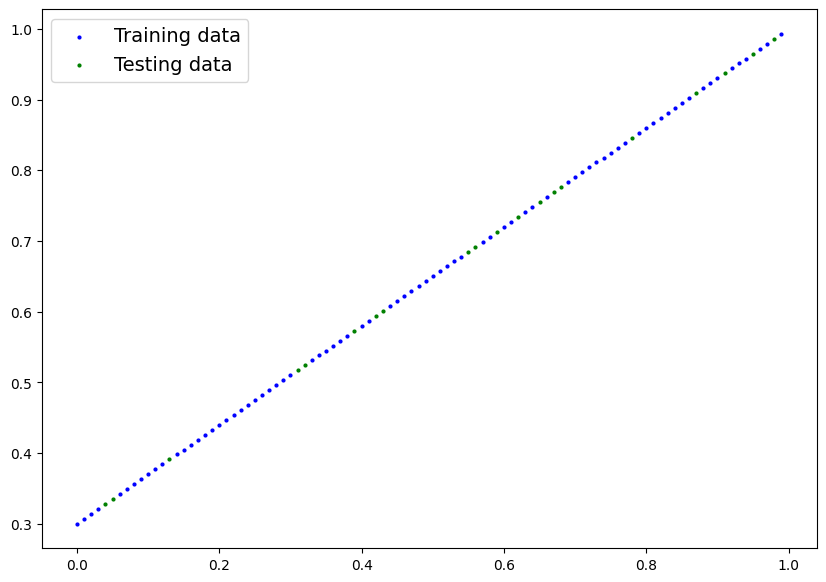

In [92]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [93]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [94]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.3700],
         [0.5300],
         [0.4400],
         [0.2100],
         [0.7300],
         [0.1700],
         [0.6000],
         [0.3300],
         [0.1400],
         [0.8000]]),
 tensor([[0.5590],
         [0.6710],
         [0.6080],
         [0.4470],
         [0.8110],
         [0.4190],
         [0.7200],
         [0.5310],
         [0.3980],
         [0.8600]]))

In [95]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10, bias=True),
    nn.Linear(in_features=10, out_features=10, bias=True),
    nn.Linear(in_features=10, out_features=1, bias=True)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [96]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [97]:
# Train the model
torch.manual_seed(23)
torch.cuda.manual_seed(23)

# Set the number of epochs
epochs = 30000

# Put the data on the target device
X_train_regression, y_train_regression, X_test_regression, y_test_regression = X_train_regression.to(device), y_train_regression.to(device), X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 300 == 0:
    print(f"Epoch:{epoch}   |Loss:{loss}   |Test Loss:{test_loss}")

Epoch:0   |Loss:0.3574865460395813   |Test Loss:0.08058696985244751
Epoch:300   |Loss:0.06906472146511078   |Test Loss:0.06655647605657578
Epoch:600   |Loss:0.061767466366291046   |Test Loss:0.045365460216999054
Epoch:900   |Loss:0.07030321657657623   |Test Loss:0.04383112117648125
Epoch:1200   |Loss:0.044460296630859375   |Test Loss:0.07136992365121841
Epoch:1500   |Loss:0.05026761442422867   |Test Loss:0.05906315892934799
Epoch:1800   |Loss:0.0477554090321064   |Test Loss:0.06435688585042953
Epoch:2100   |Loss:0.041397880762815475   |Test Loss:0.07155880331993103
Epoch:2400   |Loss:0.07091518491506577   |Test Loss:0.04616565257310867
Epoch:2700   |Loss:0.07455237954854965   |Test Loss:0.03936026617884636
Epoch:3000   |Loss:0.050312794744968414   |Test Loss:0.05789829045534134
Epoch:3300   |Loss:0.057336896657943726   |Test Loss:0.04284944012761116
Epoch:3600   |Loss:0.050173722207546234   |Test Loss:0.057748645544052124
Epoch:3900   |Loss:0.052761614322662354   |Test Loss:0.055955924

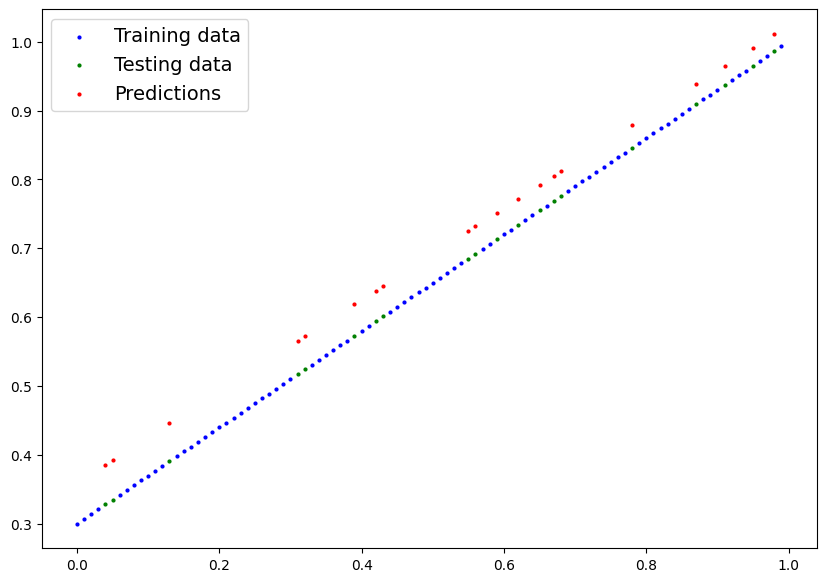

In [98]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot the data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity
" What patterns coukd you draw if you were given an infinite amount of straight and non-straight line."

Or in machine learning terms, an infinitte (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

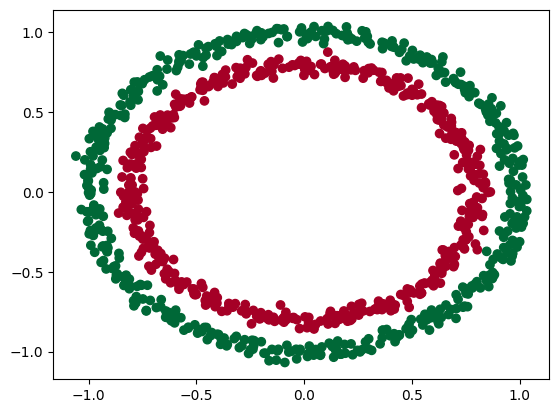

In [99]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn_r);

In [100]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Check the length
print(len(X_train), len(y_train), len(X_test), len(y_test))

800 800 200 200


In [101]:
# Setting the train, test data into the devices
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

### 6.2 Building a model with non-linearity
* Linear = straight-line
* Non-linear = non-straight lines

Artificial Neural Networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in the data.

In [102]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()   # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions ?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [103]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [104]:
# Random seeds
torch.manual_seed(23)
torch.cuda.manual_seed(23)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)   # BCEWithLogitsLoss (takes in logist as first_input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test)
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits.squeeze(dim=1), y_test)
    test_acc = accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    # Printing out what's happening
    if epoch % 100 == 0:
      print(f"Epoch:{epoch}   | Loss:{loss}   | Acc:{acc}   | Test Loss:{test_loss}   | Test Acc:{test_acc}")




Epoch:0   | Loss:0.7007403373718262   | Acc:49.25   | Test Loss:0.6918438076972961   | Test Acc:10600.0
Epoch:100   | Loss:0.6897681951522827   | Acc:54.87499999999999   | Test Loss:0.6925818920135498   | Test Acc:9676.0
Epoch:200   | Loss:0.6878445148468018   | Acc:54.0   | Test Loss:0.6914299130439758   | Test Acc:9670.0
Epoch:300   | Loss:0.6854142546653748   | Acc:56.25   | Test Loss:0.6897774338722229   | Test Acc:9736.0
Epoch:400   | Loss:0.6821995377540588   | Acc:61.75000000000001   | Test Loss:0.6875776052474976   | Test Acc:9784.0
Epoch:500   | Loss:0.6775383949279785   | Acc:60.62499999999999   | Test Loss:0.6845008134841919   | Test Acc:9880.0
Epoch:600   | Loss:0.671058177947998   | Acc:58.875   | Test Loss:0.6797343492507935   | Test Acc:9964.0
Epoch:700   | Loss:0.6629432439804077   | Acc:59.0   | Test Loss:0.6736200451850891   | Test Acc:9988.0
Epoch:800   | Loss:0.651588499546051   | Acc:60.62499999999999   | Test Loss:0.6628223657608032   | Test Acc:9964.0
Epoch:900  

In [105]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2563, -0.3268],
                      [-0.1097, -0.2022],
                      [ 1.1221, -0.7440],
                      [-0.5084,  1.1097],
                      [-0.0463, -0.8210],
                      [ 0.2445, -0.5618],
                      [ 0.6467,  0.1442],
                      [-0.2182, -0.5812],
                      [-0.2782, -0.2232],
                      [-0.0624, -0.4583]])),
             ('layer_1.bias',
              tensor([ 0.4116, -0.4658, -0.4278, -0.2763, -0.1466, -0.6770,  0.6559,  0.6223,
                       0.6397, -0.2226])),
             ('layer_2.weight',
              tensor([[-0.0144, -0.0135, -0.2645, -0.0991, -0.0134, -0.1974,  0.1345, -0.1547,
                        0.1586,  0.1041],
                      [ 0.0490, -0.2652, -0.1240,  0.5192, -0.1165,  0.0434, -0.3686, -0.1262,
                       -0.0767, -0.2614],
                      [-0.3268, -0.1194,  0.8798,  0.8653,  0.4274,  0.1

### 6.4 Evaluating a model trained with non-linear activation functions

In [106]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([0., 1., 0., 1., 0., 0., 1., 1., 1., 0.]),
 tensor([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

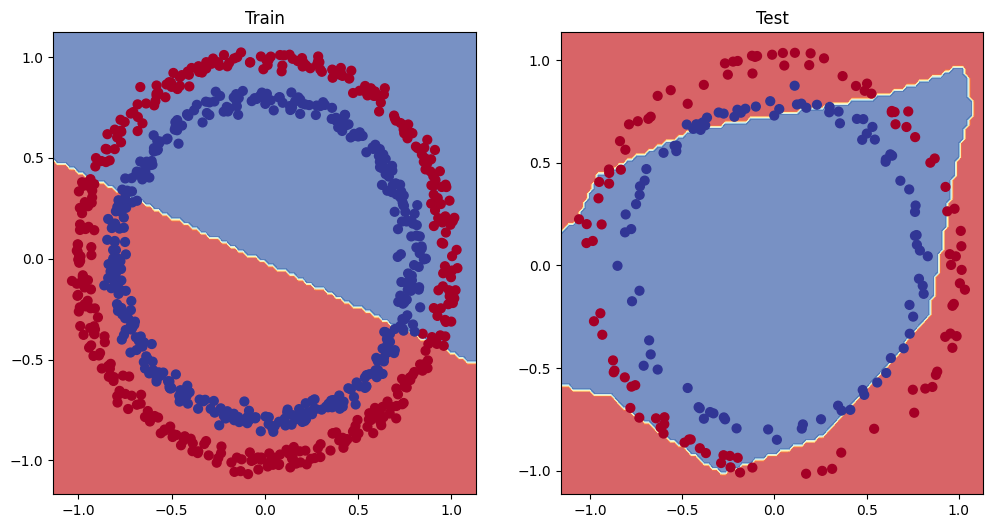

In [107]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,     # model_1 = has no non-linearity
                       X_train,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)   # model_3 = has non-linearity

## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and find patterns on it's own.

And these tools are non-linear functions

In [108]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [109]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

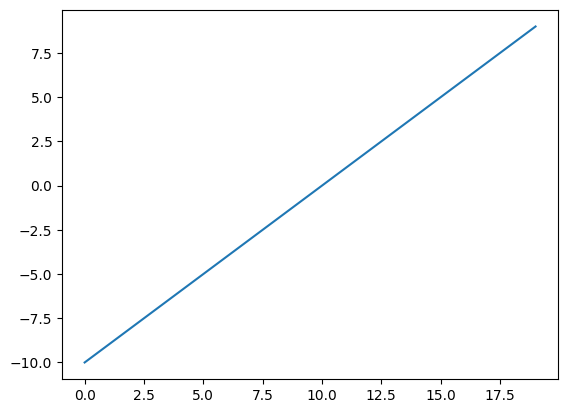

In [110]:
# Visualize the tensor
plt.plot(A);

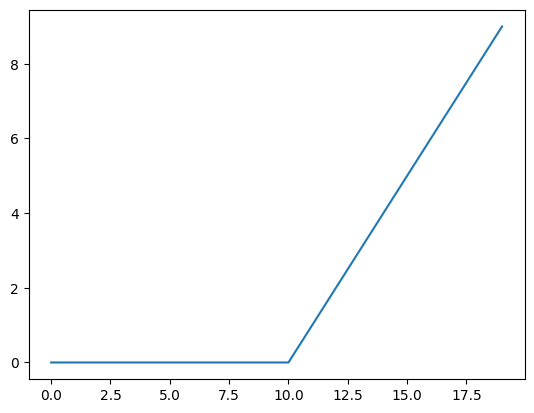

In [111]:
plt.plot(torch.relu(A));

In [112]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [113]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)    # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

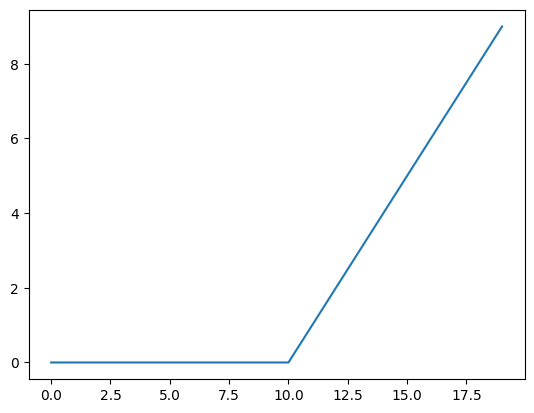

In [114]:
# Plot the ReLU activation functions
plt.plot(relu(A));

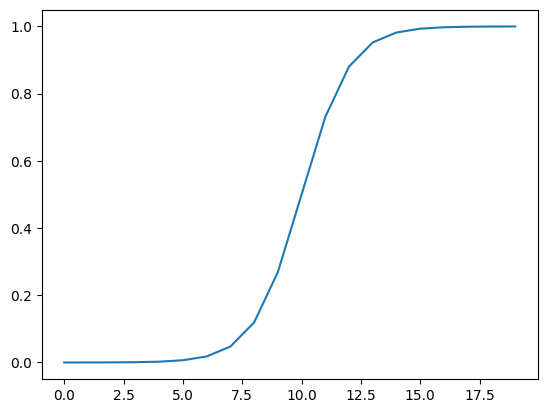

In [115]:
# Now lets' do the same for sigmois
def sigmoid(x):
  z = 1/(1+torch.exp(-x))
  return z

plt.plot(sigmoid(A));

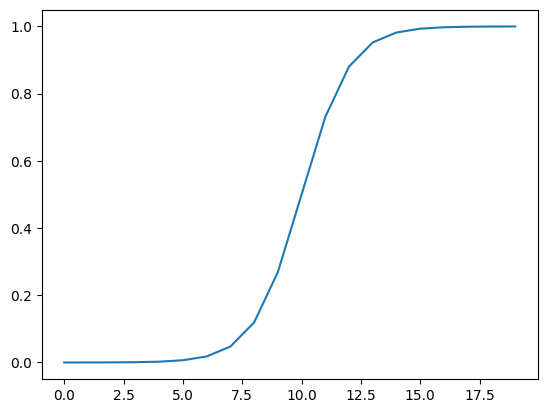

In [116]:
plt.plot(torch.sigmoid(A));

## 8. Putting it all together with a multi-class classification
* Binary Classification = one thing or another (eg:- cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-Class Classification = more than one thing or another (cats vs dogs vs chicken)

### 8.1 Creating a toy multi-class dataset

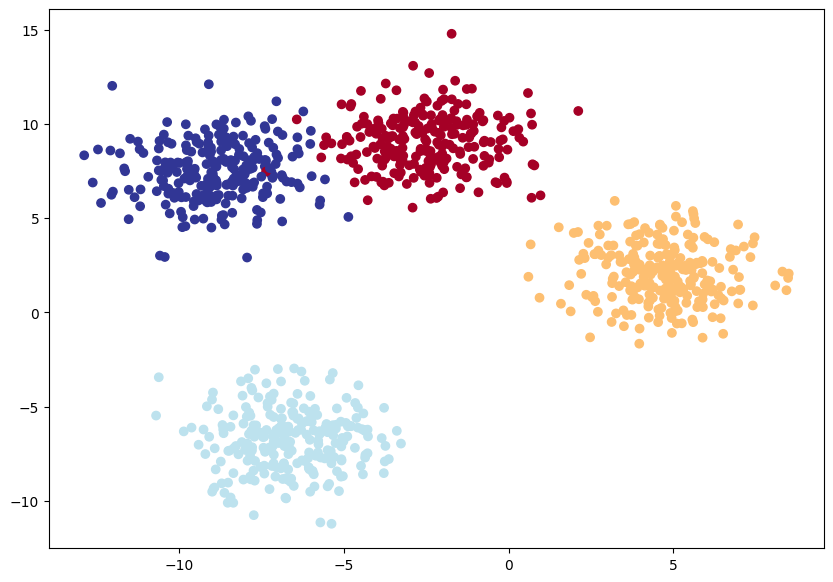

In [117]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for multi-class data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,  # give clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (Visualize, visulaize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[: ,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Buildimg a multi-class classification model in PyTorch

In [118]:
# Create device agnostic code
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cpu'

In [134]:
# Build a multi-class classification model
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    '''
    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:

    '''
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [135]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

### 8.3 Create a loss function and an optimizer for the multi-class classification model

In [136]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)   # learning rate is a parameter you can change

### 8.4 Getting prediction probabilities for a multi-class PyTorch model
In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels.

Logits -> Pred probs -> Pred labels

In [137]:
# Let's get some raw predictions (logits)
model_4.eval()
with torch.inference_mode():
  print(y_logits:=model_4(X_blob_test))

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1045e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2929e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

In [138]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [139]:
# Convert our model's logits outputs to prediction probabilties
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5], y_blob_test[:5]

(tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]]),
 tensor([1, 3, 2, 1, 0]))

In [140]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [141]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [142]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [143]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}   |Acc:{acc:.2f}   |Loss{loss:.2f}    |Test Acc:{test_acc:.2f}    |Test Loss:{test_loss:.2f}")

Epoch:0   |Acc:40.38   |Loss1.16    |Test Acc:48.00    |Test Loss:1.08
Epoch:10   |Acc:96.75   |Loss0.64    |Test Acc:97.50    |Test Loss:0.66
Epoch:20   |Acc:98.50   |Loss0.43    |Test Acc:100.00    |Test Loss:0.43
Epoch:30   |Acc:99.12   |Loss0.25    |Test Acc:99.50    |Test Loss:0.25
Epoch:40   |Acc:99.25   |Loss0.11    |Test Acc:99.50    |Test Loss:0.10
Epoch:50   |Acc:99.25   |Loss0.07    |Test Acc:99.50    |Test Loss:0.06
Epoch:60   |Acc:99.25   |Loss0.05    |Test Acc:99.50    |Test Loss:0.04
Epoch:70   |Acc:99.25   |Loss0.04    |Test Acc:99.50    |Test Loss:0.03
Epoch:80   |Acc:99.25   |Loss0.04    |Test Acc:99.50    |Test Loss:0.03
Epoch:90   |Acc:99.25   |Loss0.04    |Test Acc:99.50    |Test Loss:0.03


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [144]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [145]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [146]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

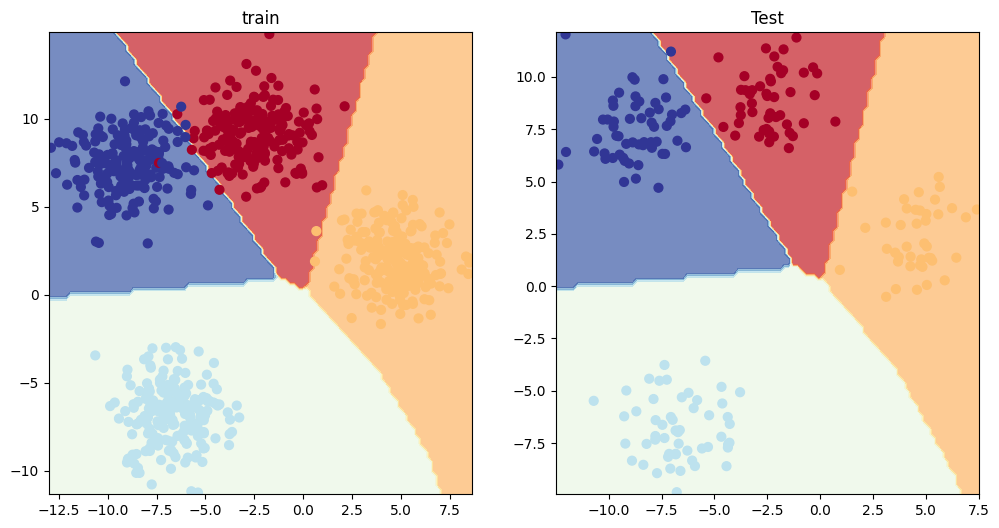

In [147]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics ... (to evaluate our classofication model)
* Accuracy - out of 100 samples how many does our model get right
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report

In [148]:
 !pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.5 MB/s eta 0:00:00


In [153]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)

# Calculate accuracy
torchmetric_accuracy(test_preds, y_blob_test)

tensor(0.9950)

In [152]:
y_preds[:3], y_blob_test[:3]

(tensor([1, 0, 0]), tensor([1, 3, 2]))